<a href="https://colab.research.google.com/github/whtnals135/Aiffel_Project/blob/main/Aiffel_2nd_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aiffel_2nd_Project

- EDA를 할 수 있습니다.
- 데이터 전처리를 할 수 있습니다.
- 머신러닝 모델을 학습하고, 예측할 수 있습니다.

id                                            name   host_id  \
0  14963583          Room in South Harlem near Central Park  94219511   
1   9458704  Large 1BR Apartment, near Times Sq (2nd Floor)  49015331   

  host_name neighbourhood_group   neighbourhood  latitude  longitude  \
0    Gilles           Manhattan          Harlem  40.80167  -73.95781   
1     Iradj           Manhattan  Hell's Kitchen  40.76037  -73.99016   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room     70               3                  3  2019-01-01   
1  Entire home/apt    240               2                 64  2019-06-30   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.09                               2                 0  
1               1.68                               2               262

id                                               name   host_id  \
0  30913224  Cozy and Sunny Room Williamsburg, Luxury Building  33771081   
1    971247                   Sunny Artist Live/Work Apartment   5308961   

  host_name neighbourhood_group    neighbourhood  latitude  longitude  \
0      Rémy            Brooklyn     Williamsburg  40.70959  -73.94652   
1     Larry           Manhattan  Upper West Side  40.79368  -73.96487   

         room_type  minimum_nights  number_of_reviews last_review  \
0     Private room               3                  2  2019-05-08   
1  Entire home/apt               3                159  2019-07-03   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.31                               1                 0  
1               2.09                               1               244

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.77262e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


54779.908150639065
56246.252391301874
48159.125070259135
나의 점수는 (MSE 49391.07382724023 입니다.


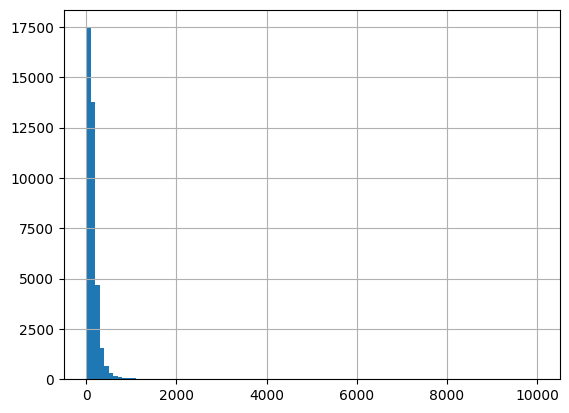

In [9]:
# 라이브러리
import pandas as pd

# 데이터 불러오기
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# 데이터 크기
train.shape, test.shape

# 데이터 샘플
display(train.head(2))
display(test.head(2))

# 데이터 타입
train.info()

# 결측치(train)
train.isnull().sum()

# 결측치(test)
test.isnull().sum()

# target(hist)
train['price'].hist(bins=100)

# target(describe)
train['price'].describe()

# 피처(host_id)
train['host_id'].value_counts()

# 결측치 컬럼 삭제(last_review)
# [[YOUR CODE]]
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)

# 결측치 채우기

train['reviews_per_month'] = train['reviews_per_month'].fillna(0)

test['reviews_per_month'] = test['reviews_per_month'].fillna(0)


# 결측치 확인

print(train.isnull().sum())
test.isnull().sum()

# 가격 값 복사

target = train['price']
train = train.drop('price', axis = 1)

# 수치형 피처 선택

cols = [
    'id',
    'host_id',
    'latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

train = train[cols]
test = test[cols]

# 검증 데이터 분리


from sklearn.model_selection import train_test_split
X_train, X_vali, y_train, y_vali = train_test_split(train, target, test_size = 0.2, random_state = 1000)
X_train.shape, X_vali.shape, y_train.shape, y_vali.shape

# 머신러닝(회귀)

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_vali)
pred
print(mean_squared_error(y_vali, pred))

# 릿지 회귀

from sklearn.linear_model import Ridge
model = Ridge(alpha = 0.05)
model.fit(X_train, y_train)
pred = model.predict(X_vali)
pred
print(mean_squared_error(y_vali, pred))

# 라쏘 회귀

from sklearn.linear_model import Lasso
model = Lasso(alpha = 0.05)
model.fit(X_train, y_train)
pred = model.predict(X_vali)
pred
print(mean_squared_error(y_vali, pred))

# 엘라스틱넷 회귀

from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha = 0.05, l1_ratio = 0.9)
model.fit(X_train, y_train)
pred = model.predict(X_vali)
pred
print(mean_squared_error(y_vali, pred))

# 랜덤포레스트

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_vali)
pred
print(mean_squared_error(y_vali, pred))


# Xgboost


from xgboost import XGBRegressor
model = XGBRegressor(learning_rate = 0.1,
                     max_depth =3,
                     n_estimators=100,
                     subsample=0.7)
model.fit(X_train, y_train)
pred = model.predict(X_vali)
pred
print(mean_squared_error(y_vali, pred))

# test 데이터 예측 및 평가
y_test = pd.read_csv('/content/y_test.csv')

# Xgboost
pred = model.predict(test)
print(mean_squared_error(y_test, pred))

# baseline score(mse 51xxx) 보다 점수가 낮게 나오도록 도전해 보세요!
print("나의 점수는 (MSE 48159.125070259135 입니다.")

###  *Project 02 회고*
1. KEEP
- 회귀에서는 수치형 데이터를 이용해야하는 점을 다시 한번 떠올렸다. 문제를 보고 당황하지 않고 바로 작성해 나갔다. 릿지,라쏘,엘라스틱넷.랜덤포레스트, XG부스트를 사용할 때 손가락이 기억하듯 fit과 predict를 사용했다. :)

2. Problem
- 노드 학습 중에는 가격값을 복사해온 후에 검증데이터 분리를 따로 따로 하지 않고 , train_test_split을 선언 함과 동시에 작성하였었는데 기억이 나질 않아 구글링 하고 노드를 다시 보았다. 기억이 부분 부분 끊겨있는 것 같다....

3. Try
- 그래도 구글링해보며 도전했다.